# EEG Movement Classifier

## Import Required Libraries

In [1]:
!pip install -q mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 14.3 MB/s eta 0:00:00


In [2]:
import mne

import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report ,confusion_matrix
import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.applications import VGG16

In [3]:
mne.set_log_level('CRITICAL')

## Data Loading

### Download Data

In [4]:
# https://physionet.org/content/eegmmidb/1.0.0/
!gdown 185G13sVNTx4PtdH5gJ2ySwjPttusqSHG

Downloading...
From: https://drive.google.com/uc?id=185G13sVNTx4PtdH5gJ2ySwjPttusqSHG
To: /content/eeg-motor-movementimagery-dataset-1.0.0.zip
100% 2.00G/2.00G [00:22<00:00, 89.1MB/s]


In [5]:
!unzip -q eeg-motor-movementimagery-dataset-1.0.0.zip
!mv files eegmmidb

### Get Signal of Some Sample

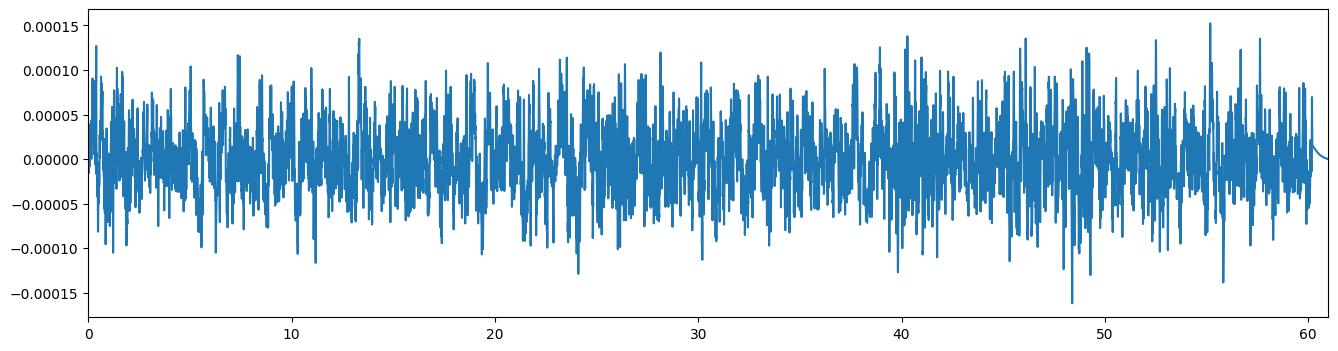

<Figure size 640x480 with 0 Axes>

In [6]:
raw_edf = mne.io.read_raw_edf('eegmmidb/S001/S001R02.edf', preload=True)
raw_edf.filter(l_freq=1, h_freq=None)
data_times = raw_edf.times
data_channels = raw_edf.get_data()
data_channel = data_channels[0]

plt.figure(figsize=(16,4))
plt.xlim(0, max(data_times))
plt.plot(data_times, data_channel)
plt.show()
plt.clf()

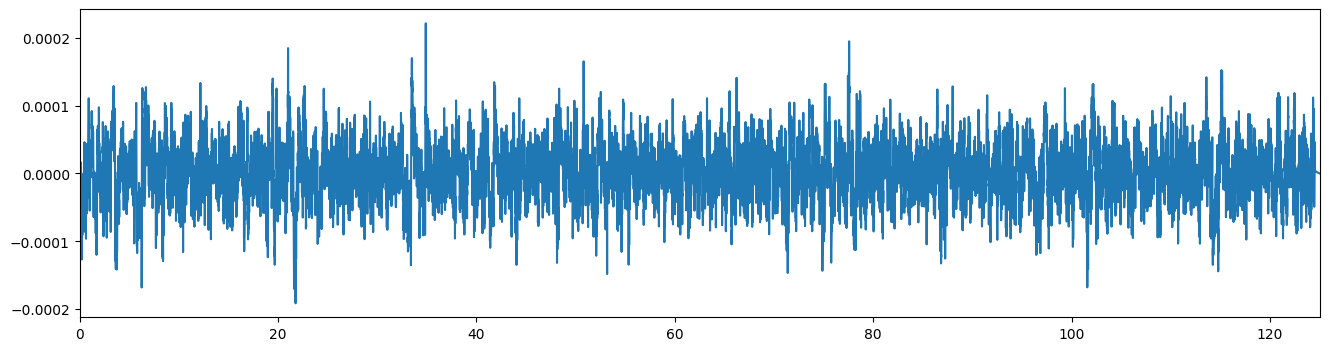

<Figure size 640x480 with 0 Axes>

In [7]:
raw_edf = mne.io.read_raw_edf('eegmmidb/S001/S001R04.edf', preload=True)
raw_edf.filter(l_freq=1, h_freq=None)
data_times = raw_edf.times
data_channels = raw_edf.get_data()
data_channel = data_channels[0]

plt.figure(figsize=(16,4))
plt.xlim(0, max(data_times))
plt.plot(data_times, data_channel)
plt.show()
plt.clf()

## Data Preprocessing

### Transforming EDF Signals to Spectrogram

In [8]:
num_subjects = 109
num_labels = 4

In [9]:
def pad_number(num, maxlen):
  num_str = f'{num}'
  num_digits = len(num_str)
  return num_str if num_digits >= maxlen else '0' * (maxlen - num_digits) + num_str

In [10]:
def extract_spectrogram(subject_code, label_code):
  raw_edf = mne.io.read_raw_edf(f'eegmmidb/{subject_code}/{subject_code}{label_code}.edf', preload=True)
  raw_edf.filter(l_freq=1, h_freq=None)
  data_channels = raw_edf.get_data()

  for i in range(5): # Get the first 5 channels only
    plt.specgram(data_channels[i], Fs=raw_edf.info['sfreq'], cmap='viridis', aspect='auto', NFFT=256, noverlap=128)
    plt.axis('off')
    plt.savefig(f'processed_data/{label_code}/{subject_code}{label_code}C{i}.png', bbox_inches='tight', pad_inches=0, transparent=True)
    plt.clf()

In [11]:
def extract_spectrograms(subject_start, subject_end):
  for i in range(subject_start, subject_end):
    print(f'Extracting Subject {i}...')
    for j in range(1, num_labels + 1):
      subject_code = f'S{pad_number(i, maxlen=3)}'
      label_code = f'R{pad_number(j, maxlen=2)}'
      extract_spectrogram(subject_code, label_code)
  print('Spectrogram Extraction Completed!')

In [12]:
os.mkdir('processed_data')
for i in range(1, num_labels + 1):
  os.mkdir(f'processed_data/R{pad_number(i, maxlen=2)}')

In [13]:
extract_spectrograms(1, num_subjects + 1)

Extracting Subject 1...
Extracting Subject 2...
Extracting Subject 3...
Extracting Subject 4...
Extracting Subject 5...
Extracting Subject 6...
Extracting Subject 7...
Extracting Subject 8...
Extracting Subject 9...
Extracting Subject 10...
Extracting Subject 11...
Extracting Subject 12...
Extracting Subject 13...
Extracting Subject 14...
Extracting Subject 15...
Extracting Subject 16...
Extracting Subject 17...
Extracting Subject 18...
Extracting Subject 19...
Extracting Subject 20...
Extracting Subject 21...
Extracting Subject 22...
Extracting Subject 23...
Extracting Subject 24...
Extracting Subject 25...
Extracting Subject 26...
Extracting Subject 27...
Extracting Subject 28...
Extracting Subject 29...
Extracting Subject 30...
Extracting Subject 31...
Extracting Subject 32...
Extracting Subject 33...
Extracting Subject 34...
Extracting Subject 35...
Extracting Subject 36...
Extracting Subject 37...
Extracting Subject 38...
Extracting Subject 39...
Extracting Subject 40...
Extractin

<Figure size 640x480 with 0 Axes>

In [14]:
!zip -r processed_data.zip processed_data

  adding: processed_data/ (stored 0%)
  adding: processed_data/R04/ (stored 0%)
  adding: processed_data/R04/S018R04C4.png (deflated 0%)
  adding: processed_data/R04/S098R04C2.png (deflated 0%)
  adding: processed_data/R04/S031R04C3.png (deflated 0%)
  adding: processed_data/R04/S042R04C1.png (deflated 0%)
  adding: processed_data/R04/S083R04C3.png (deflated 0%)
  adding: processed_data/R04/S065R04C3.png (deflated 0%)
  adding: processed_data/R04/S005R04C1.png (deflated 0%)
  adding: processed_data/R04/S056R04C4.png (deflated 0%)
  adding: processed_data/R04/S109R04C0.png (deflated 0%)
  adding: processed_data/R04/S026R04C2.png (deflated 0%)
  adding: processed_data/R04/S045R04C4.png (deflated 0%)
  adding: processed_data/R04/S090R04C0.png (deflated 0%)
  adding: processed_data/R04/S076R04C1.png (deflated 0%)
  adding: processed_data/R04/S009R04C1.png (deflated 0%)
  adding: processed_data/R04/S060R04C4.png (deflated 0%)
  adding: processed_data/R04/S030R04C3.png (deflated 0%)
  adding

In [ ]:
from google.colab import files
files.download('processed_data.zip')

### Split Data Into Training and Testing

In [ ]:
!mkdir processed_data/train
!mkdir processed_data/test

In [ ]:
for i in range(1, 5):
  os.rename(f'processed_data/R{pad_number(i, maxlen=2)}', f'processed_data/train/R{pad_number(i, maxlen=2)}')
  os.mkdir(f'processed_data/test/R{pad_number(i, maxlen=2)}')

In [ ]:
num_train = int(0.6 * num_subjects) # 60% training
num_val = int(0.5 * (num_subjects - num_train)) # 20% validation
num_test = num_subjects - num_train - num_val # 20% testing
print(num_train)
print(num_val)
print(num_test)

65
22
22


In [ ]:
for i in range(num_subjects - num_test + 1, num_subjects + 1):
  for j in range(1, 5):
    subject_code = f'S{pad_number(i, maxlen=3)}'
    label_code = f'R{pad_number(j, maxlen=2)}'
    os.rename(f'processed_data/train/R{pad_number(j, maxlen=2)}/{subject_code}R{pad_number(j, maxlen=2)}C0.png', f'processed_data/test/R{pad_number(j, maxlen=2)}/{subject_code}R{pad_number(j, maxlen=2)}C0.png')
    os.rename(f'processed_data/train/R{pad_number(j, maxlen=2)}/{subject_code}R{pad_number(j, maxlen=2)}C1.png', f'processed_data/test/R{pad_number(j, maxlen=2)}/{subject_code}R{pad_number(j, maxlen=2)}C1.png')
    os.rename(f'processed_data/train/R{pad_number(j, maxlen=2)}/{subject_code}R{pad_number(j, maxlen=2)}C2.png', f'processed_data/test/R{pad_number(j, maxlen=2)}/{subject_code}R{pad_number(j, maxlen=2)}C2.png')
    os.rename(f'processed_data/train/R{pad_number(j, maxlen=2)}/{subject_code}R{pad_number(j, maxlen=2)}C3.png', f'processed_data/test/R{pad_number(j, maxlen=2)}/{subject_code}R{pad_number(j, maxlen=2)}C3.png')
    os.rename(f'processed_data/train/R{pad_number(j, maxlen=2)}/{subject_code}R{pad_number(j, maxlen=2)}C4.png', f'processed_data/test/R{pad_number(j, maxlen=2)}/{subject_code}R{pad_number(j, maxlen=2)}C4.png')

### Image Data Generator

In [ ]:
# R01 is similar to R02, this class is excluded to avoid confusion in model
!rm -rf processed_data/train/R01
!rm -rf processed_data/test/R01

# R03 is also similar to R04
!rm -rf processed_data/train/R03
!rm -rf processed_data/test/R03

In [ ]:
train_datagen = ImageDataGenerator(
                    dtype='float32',
                    preprocessing_function=preprocess_input,
                    width_shift_range=0.1,
                    height_shift_range=0.1,
                    zoom_range=0.1,
                    validation_split=0.25)

val_datagen = ImageDataGenerator(
                        dtype='float32',
                        preprocessing_function=preprocess_input,
                        validation_split=0.25)

test_datagen = ImageDataGenerator(
                        dtype='float32',
                        preprocessing_function=preprocess_input)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        'processed_data/train',
        target_size=(224,224),
        batch_size=32,
        shuffle=False,
        class_mode='categorical',
        subset='training')

validation_generator = val_datagen.flow_from_directory(
        'processed_data/train',
        target_size=(224,224),
        batch_size=32,
        shuffle=False,
        class_mode='categorical',
        subset='validation')

test_generator = test_datagen.flow_from_directory(
        'processed_data/test',
        target_size=(224,224),
        batch_size=32,
        shuffle=False,
        class_mode='categorical')

Found 654 images belonging to 2 classes.
Found 216 images belonging to 2 classes.
Found 220 images belonging to 2 classes.


## Creating Model

In [ ]:
pre_trained_model = VGG16(weights='imagenet',
                     include_top=False,
                     input_shape=(224,224,3))

for layer in pre_trained_model.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
model = tf.keras.models.Sequential([
    pre_trained_model,
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='softmax')
])

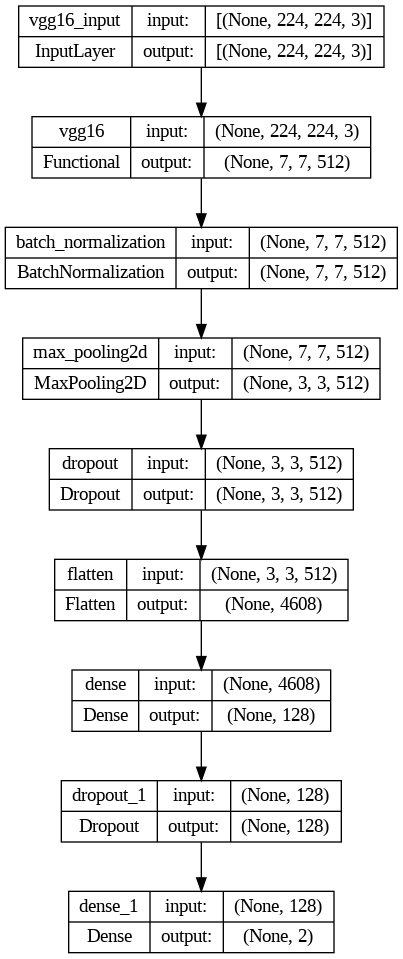

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=10)

Epoch 1/10
21/21 [==============================] - 19s 786ms/step - loss: 2.0396 - accuracy: 0.6789 - val_loss: 0.6901 - val_accuracy: 0.5833
Epoch 2/10
21/21 [==============================] - 19s 915ms/step - loss: 0.5625 - accuracy: 0.7691 - val_loss: 0.2505 - val_accuracy: 1.0000
Epoch 3/10
21/21 [==============================] - 17s 789ms/step - loss: 0.2593 - accuracy: 0.9098 - val_loss: 0.1110 - val_accuracy: 1.0000
Epoch 4/10
21/21 [==============================] - 17s 791ms/step - loss: 0.0971 - accuracy: 0.9740 - val_loss: 0.0174 - val_accuracy: 1.0000
Epoch 5/10
21/21 [==============================] - 19s 916ms/step - loss: 0.0552 - accuracy: 0.9817 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 6/10
21/21 [==============================] - 18s 852ms/step - loss: 0.0467 - accuracy: 0.9862 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 7/10
21/21 [==============================] - 25s 1s/step - loss: 0.0328 - accuracy: 0.9878 - val_loss: 0.0057 - val_accuracy: 1.0000
Ep

## Plot the Training Result

Text(0.5, 1.0, 'Training and Validation Loss')

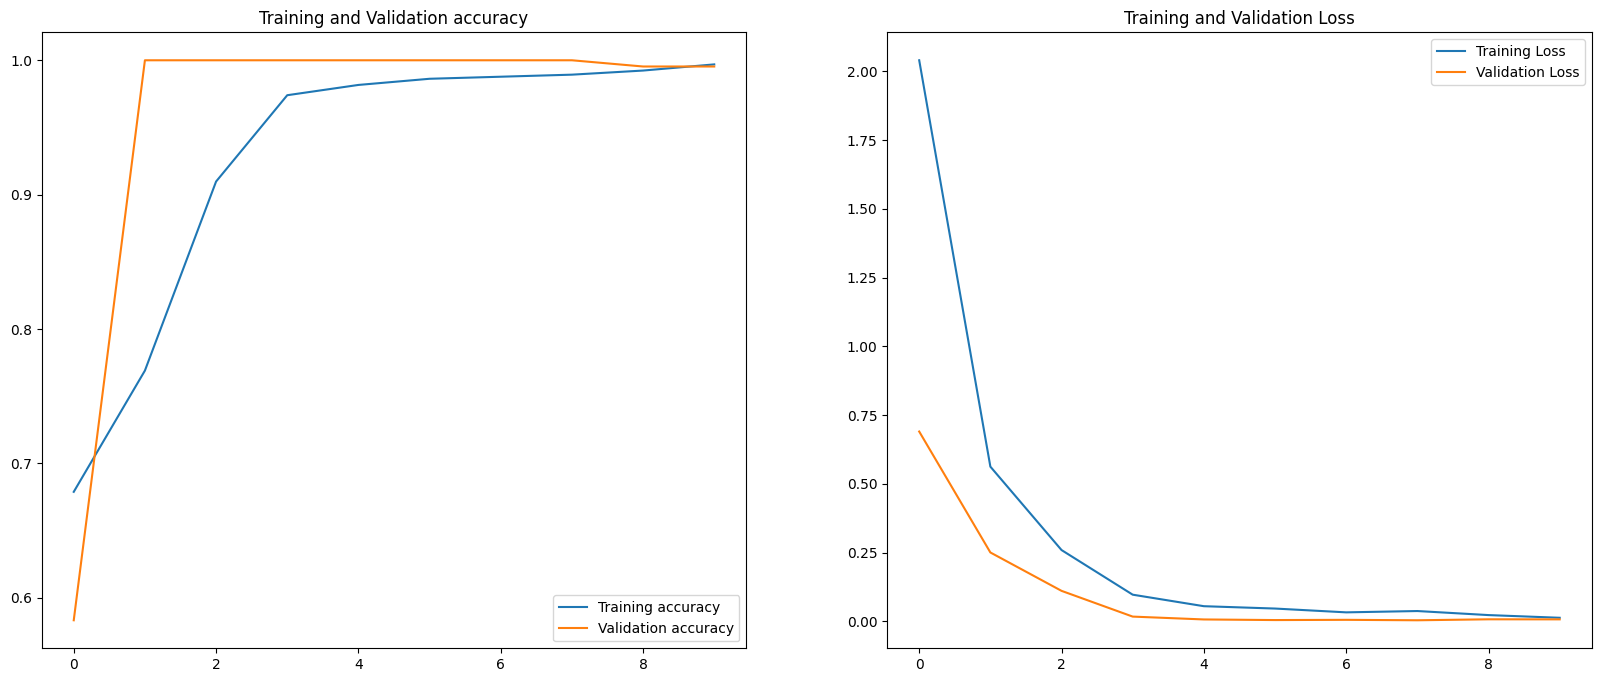

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = np.arange(len(accuracy))

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

## Test the Model Using Test Data

In [ ]:
num_test_samples = len(test_generator)
num_classes = len(test_generator.class_indices)

predicted_probabilities = model.predict(test_generator, steps=num_test_samples)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

true_labels = test_generator.classes

print(classification_report(true_labels, predicted_labels))

7/7 [==============================] - 7s 998ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       110

    accuracy                           1.00       220
   macro avg       1.00      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220



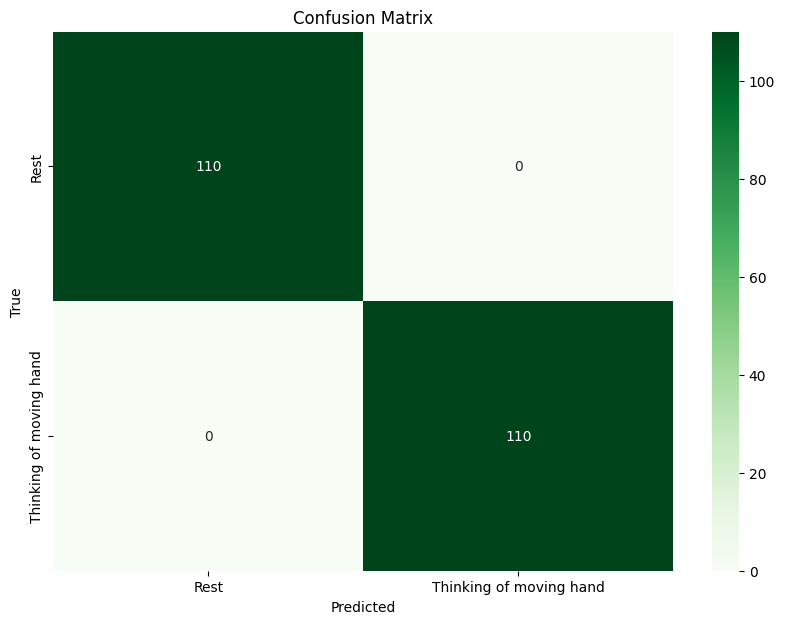

In [ ]:
cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Greens', xticklabels=['Rest', 'Thinking of moving hand'], yticklabels=['Rest', 'Thinking of moving hand'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Save Model

In [ ]:
model.save('model_simple.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
